<a href="https://colab.research.google.com/github/Juggernaut2705/Deep-Learning-Model-on-Roads-Quality/blob/main/NHAI_Assignment_Vikash_Prasad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Approach to building a deep learning model for distinguishing good roads from bad ones**



This project can be considered to be a supervised learning task where we train a machine learning model by providing images to it. Images comprise good and bad roads.

### **Available/Used resources:**



*   Training and validation set for both good and bad roads images
*   Google Colab's notebook with T4 GPU
*   Tensorflow documentation
*   Internet resources for information on models


### **Data Preparation and preprocessing:**
Dataset of road images was put in one folder of train data and validation data.

Image sizes were also checked while playing around with the target size and input shape. Finally we decided to go with (224, 224).

Resize or cropping and normalizing pixel values in the images so that they can be fed into the neural network.

We then split the dataset into training, validation, and test sets. The training set will be used to train the model, the validation set to tune hyperparameters, and the test set to evaluate the final performance.



### **Appyling a Deep Learning Model:**

*Here comes the first the call to be taken where we had to decide that given the limited computation resources whether we should use transfer learning by taking the advantage of a previous built model on a bigger dataset and then fine-tune it for our own purpose*

Convolutional neural networks are commonly used for the image classification problem as they help in extracting the spatial features from images such as edges, corners and textures. Among the CNNs, we have tried MobileNet and ResNet.


Two approaches:


*   Used pre-trained CNN models
*   Built a custom CNN

*These two approaches were taken instead of one, only due to curiosity and just playing around with the data*.


#### **Model Architecture:**



*   Convolutional layers
*   Output layer

This varies for the three models that we have considered. For the transfer learning models, hidden layers are already used by the model and we are not touching them at all. We are just adding another layer on top of fully connected dense layer and then finally an output layer.


The output layer will have the length of folders (i.e. training dataset folder: good road and bad road), hence two neurons for making the classification.



#### **Model Training:**



*   Trained using the training data set
*   Adjusting the parameters for better accuracy


#### **Model Evaluation:**

Trained model is then evaluated on test dataset and final performance metrics such as accuracy, precision, recall, and F1-score are obtained.

Performance metrics like loss and accuracy are plotted to get an insight. We will see how bizarre and how some sensible plots are observed after model training.


#### **Model Improvement:**

This becomes a very crucial task and we are still fine-tuning the model.

The initial model didnt perform well hence we used various techniques like tuning hyperparameters, changing models, using transfer learning with different pre-trained models.

Factors like:


1.   changing learning rates, hyperparameter tuning
2.   unfreezing the base model to train the weights of the top layer along with classifier.








Importing essential libraries

In [ ]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt




We are first trying a transfer learning Model sequential here for better accuracy.

we are using resnet model for this one.

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Data_science/Train_data'
valid_path = '/content/drive/MyDrive/Data_science/Val_data'

# add preprocessing layer to the front; added channel too for RGB
resnet = ResNet50V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Not training existing weights
for layer in resnet.layers:
  layer.trainable = False



  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Data_science/Train_data/*')

Reducing the spatial dimensions/features can be done using flattening. This helps to make predictions and classifications based on these features.  

In [ ]:
# flattening and then adding the final layer
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)


#### **Model Compilation**

Categorical crossentropy is being used in below mentioned model because its a popular loss function used for multi-class classification problem.

Optimizer being Adam as it adjusts the model weights to reduce loss function during the training of the model.

In [ ]:
# creating a model object
model = Model(inputs=resnet.input, outputs=prediction)

# viewing the structure of the model
model.summary()

# tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

### **Preprocessing image dataset**



*   Instead of creating new folder containing resized or normalized images, ImageDataGenerator will help us to create a virtual folder for "images on the fly" for model training. Despite having multiple images, same image can be rotated or switched to create more training data.



*   Target size to be used for images is 224 by 224 pixels
*   Bigger the batch size, bigger the memory usage and faster it would be. But this is a commonly used batch size.





In [ ]:

from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_science/Train_data',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_science/Val_data',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

Found 13636 images belonging to 2 classes.
Found 1531 images belonging to 2 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
427/427 [==============================] - 8803s 21s/step - loss: 4.0114 - accuracy: 0.6762 - val_loss: 3.4903 - val_accuracy: 0.7400
Epoch 2/5
427/427 [==============================] - 235s 551ms/step - loss: 4.0352 - accuracy: 0.7176 - val_loss: 4.1904 - val_accuracy: 0.7374
Epoch 3/5
427/427 [==============================] - 235s 550ms/step - loss: 3.9349 - accuracy: 0.7413 - val_loss: 4.0751 - val_accuracy: 0.7178
Epoch 4/5
427/427 [==============================] - 228s 534ms/step - loss: 4.2512 - accuracy: 0.7430 - val_loss: 4.5104 - val_accuracy: 0.7263
Epoch 5/5
427/427 [==============================] - 228s 534ms/step - loss: 3.9330 - accuracy: 0.7609 - val_loss: 5.2012 - val_accuracy: 0.7289


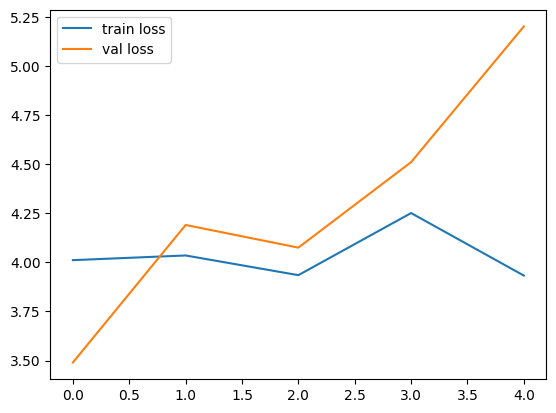

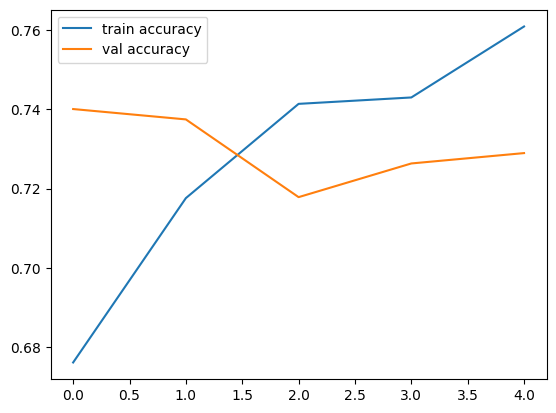

<Figure size 640x480 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

model.save('road_new_model_resnet.h5')


We will try to unfreeze some of the top layers and tune them according to our classification problem.

In [ ]:
for layer in resnet.layers:
  layer.trainable = True

In [ ]:

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(resnet.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in resnet.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  190


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
len(model.trainable_variables)

84

In [ ]:
fine_tune_epochs = 5
initial_epochs=5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(training_set,
                         epochs=total_epochs,
                         initial_epoch=r.epoch[-1],
                         validation_data=test_set)




Epoch 5/10
427/427 [==============================] - 230s 538ms/step - loss: 0.2600 - accuracy: 0.8900 - val_loss: 0.5192 - val_accuracy: 0.8021
Epoch 6/10
427/427 [==============================] - 231s 540ms/step - loss: 0.2361 - accuracy: 0.9028 - val_loss: 0.5242 - val_accuracy: 0.8119
Epoch 7/10
427/427 [==============================] - 226s 529ms/step - loss: 0.2116 - accuracy: 0.9139 - val_loss: 0.5803 - val_accuracy: 0.8060
Epoch 8/10
427/427 [==============================] - 225s 526ms/step - loss: 0.1967 - accuracy: 0.9201 - val_loss: 0.5741 - val_accuracy: 0.8086
Epoch 9/10
427/427 [==============================] - 231s 540ms/step - loss: 0.1811 - accuracy: 0.9303 - val_loss: 0.6169 - val_accuracy: 0.8047
Epoch 10/10
427/427 [==============================] - 228s 535ms/step - loss: 0.1604 - accuracy: 0.9348 - val_loss: 0.6084 - val_accuracy: 0.8145


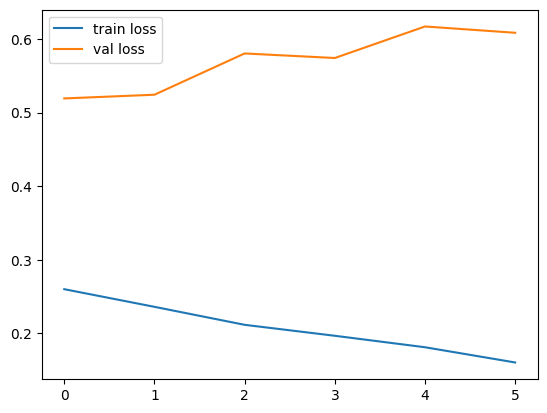

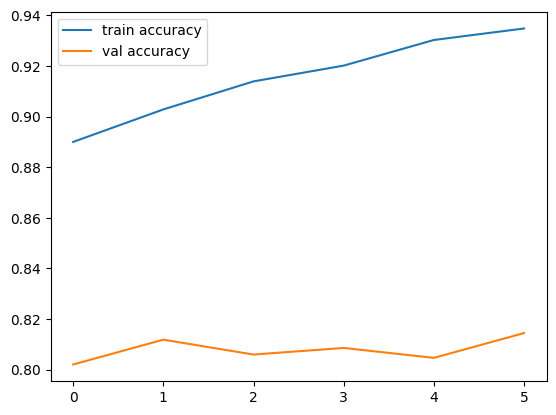

<Figure size 640x480 with 0 Axes>

In [ ]:
# loss
plt.plot(history_fine.history['loss'], label='train loss')
plt.plot(history_fine.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(history_fine.history['accuracy'], label='train accuracy')
plt.plot(history_fine.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

model.save('Roads_Transfer_learning_model_resnet_finetuned.h5')


### **Inference:**

Both training accuracy and validation accuracy increases over time. But ideally the training accuracy and validation set accuracy must have been similar.

Similarly, training loss and validation loss are in opposite direction, thus it can be inferred that even though the model has improved post fine tuning, there have been some overfitting still. We will keep refining this model.

Some parameters that can be looked at:


*   Data Augmentation: But we have done that earlier itself.
*   Dropout regularization




In [ ]:
#need to use dropout and then run the model again. Havent done that here as of now.

#import pickle
#pickle.dump(model, open('model.pkl', 'wb'))

#Cant generate pickle file as runtime error on google colab.

# **Model 2:**

Here we were creating a custom Neural Network from scratch and trying to understand how it works. Incomplete.

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data_science/Train_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-79667-35_2.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-6950-30_1.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-6939-65_1.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-81965-46_2.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-83068-9_1.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-80806-10_1.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-83068-6_2.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-83068-11_1.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-80830-1_2.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-83068-9_2.jpg
/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-TN-80

**Checking the images:**



importing done


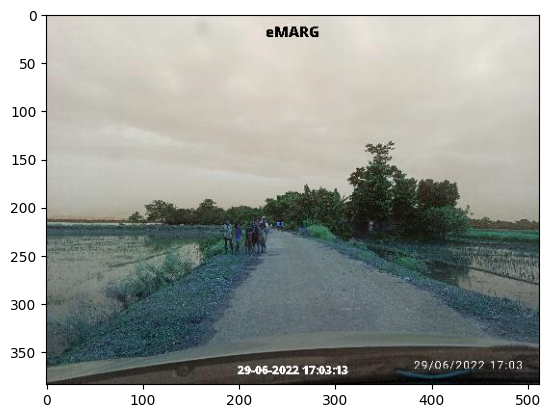

In [ ]:

import cv2
import matplotlib.pyplot as plt
print ("importing done")
plt.imshow(cv2.imread("/content/drive/MyDrive/Data_science/Train_data/emargmodel3_badroad/PE-AS-71913-16_2.jpg"))

In [ ]:

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data_science/Train_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data_science/Val_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 13636 images belonging to 2 classes.
Found 1531 images belonging to 2 classes.


In [ ]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])



In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history2=model.fit(x = train_generator, validation_data = validation_generator, epochs = 5)

Epoch 1/5


Due to constant run time errors and more focus on the first model, this couldnt be completed.

Further steps here:


*   Model evaluation based on training and validation loss and accuracy
*   Model improvement



Finally, first model can be used to predict whether road is in good or bad condition.


In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

NameError: ignored